# Water Potability

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
import seaborn as sns

plt.rcParams['figure.figsize'] = (10.0, 8) # set default size of plots
pd.set_option('display.max_rows', 2536)
pd.set_option('display.max_columns', 100)

In [6]:
df = pd.read_csv("water_potability.csv", sep=',')
df.columns = [col.lower() for col in df]
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity   
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654  \
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
# How much memory the dataset takes?
# Are there some missing values?

df.info(memory_usage='deep') # memory_usage parameter allows us to see the real memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hardness         3276 non-null   float64
 1   solids           3276 non-null   float64
 2   chloramines      3276 non-null   float64
 3   conductivity     3276 non-null   float64
 4   organic_carbon   3276 non-null   float64
 5   turbidity        3276 non-null   float64
 6   potability       3276 non-null   int64  
 7   sulfate          3276 non-null   float64
 8   trihalomethanes  3276 non-null   float64
 9   ph               3276 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [105]:
df[(df['potability'] == 1) & ((df['ph'] > 10) | (df['ph'] < 4))].count()

hardness           1069
solids             1069
chloramines        1069
conductivity       1069
organic_carbon     1069
turbidity          1069
potability         1069
sulfate            1069
trihalomethanes    1069
ph                 1069
dtype: int64

In [106]:
df.head()

hardness        solids  chloramines  conductivity  organic_carbon   
0  204.890455  20791.318981     7.300212    564.308654       10.379783  \
1  129.422921  18630.057858     6.635246    592.885359       15.180013   
2  224.236259  19909.541732     9.275884    418.606213       16.868637   
3  214.373394  22018.417441     8.059332    363.266516       18.436524   
4  181.101509  17978.986339     6.546600    398.410813       11.558279   

   turbidity  potability     sulfate  trihalomethanes         ph  
0   2.963135           0  335.408437        65.776040 -16.577468  
1   4.500656           0  334.885796        65.547685 -39.790184  
2   3.055934           0  332.929631        66.708051   5.480949  
3   4.628771           0  335.033124        66.739087   9.305726  
4   4.075075           0  335.021410        66.344148  -3.708492

In [107]:
df.describe()

hardness        solids  chloramines  conductivity  organic_carbon   
count  3276.000000   3276.000000  3276.000000   3276.000000     3276.000000  \
mean    196.369496  22014.092526     7.122277    426.205111       14.284970   
std      32.879761   8768.570828     1.583085     80.824064        3.308162   
min      47.432000    320.942611     0.352000    181.483754        2.200000   
25%     176.850538  15666.690297     6.127421    365.734414       12.065801   
50%     196.967627  20927.833607     7.130299    421.884968       14.218338   
75%     216.667456  27332.762127     8.114887    481.792304       16.557652   
max     323.124000  61227.196008    13.127000    753.342620       28.300000   

         turbidity   potability      sulfate  trihalomethanes           ph  
count  3276.000000  3276.000000  3276.000000      3276.000000  3276.000000  
mean      3.966786     0.390110   334.105131        66.232082    -2.790356  
std       0.780382     0.487849     1.957700         0.442264    12.927992  
min       1.450000     0.000000   314.179565        64.723828   -50.977707  
25%       3.439711     0.000000   333.774841        65.935402   -11.555506  
50%       3.955028     0.000000   334.732249        66.245480    -2.329173  
75%       4.500320     1.000000   335.039039        66.548174     6.467179  
max       6.739000     1.000000   337.728326        67.561365    40.257731

<AxesSubplot: >

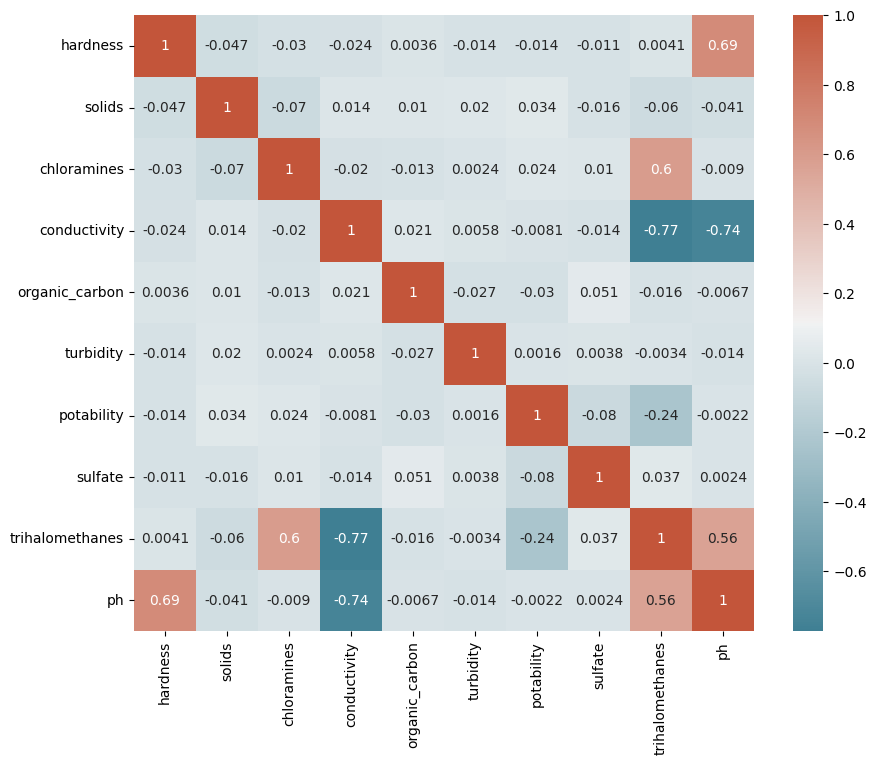

In [108]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

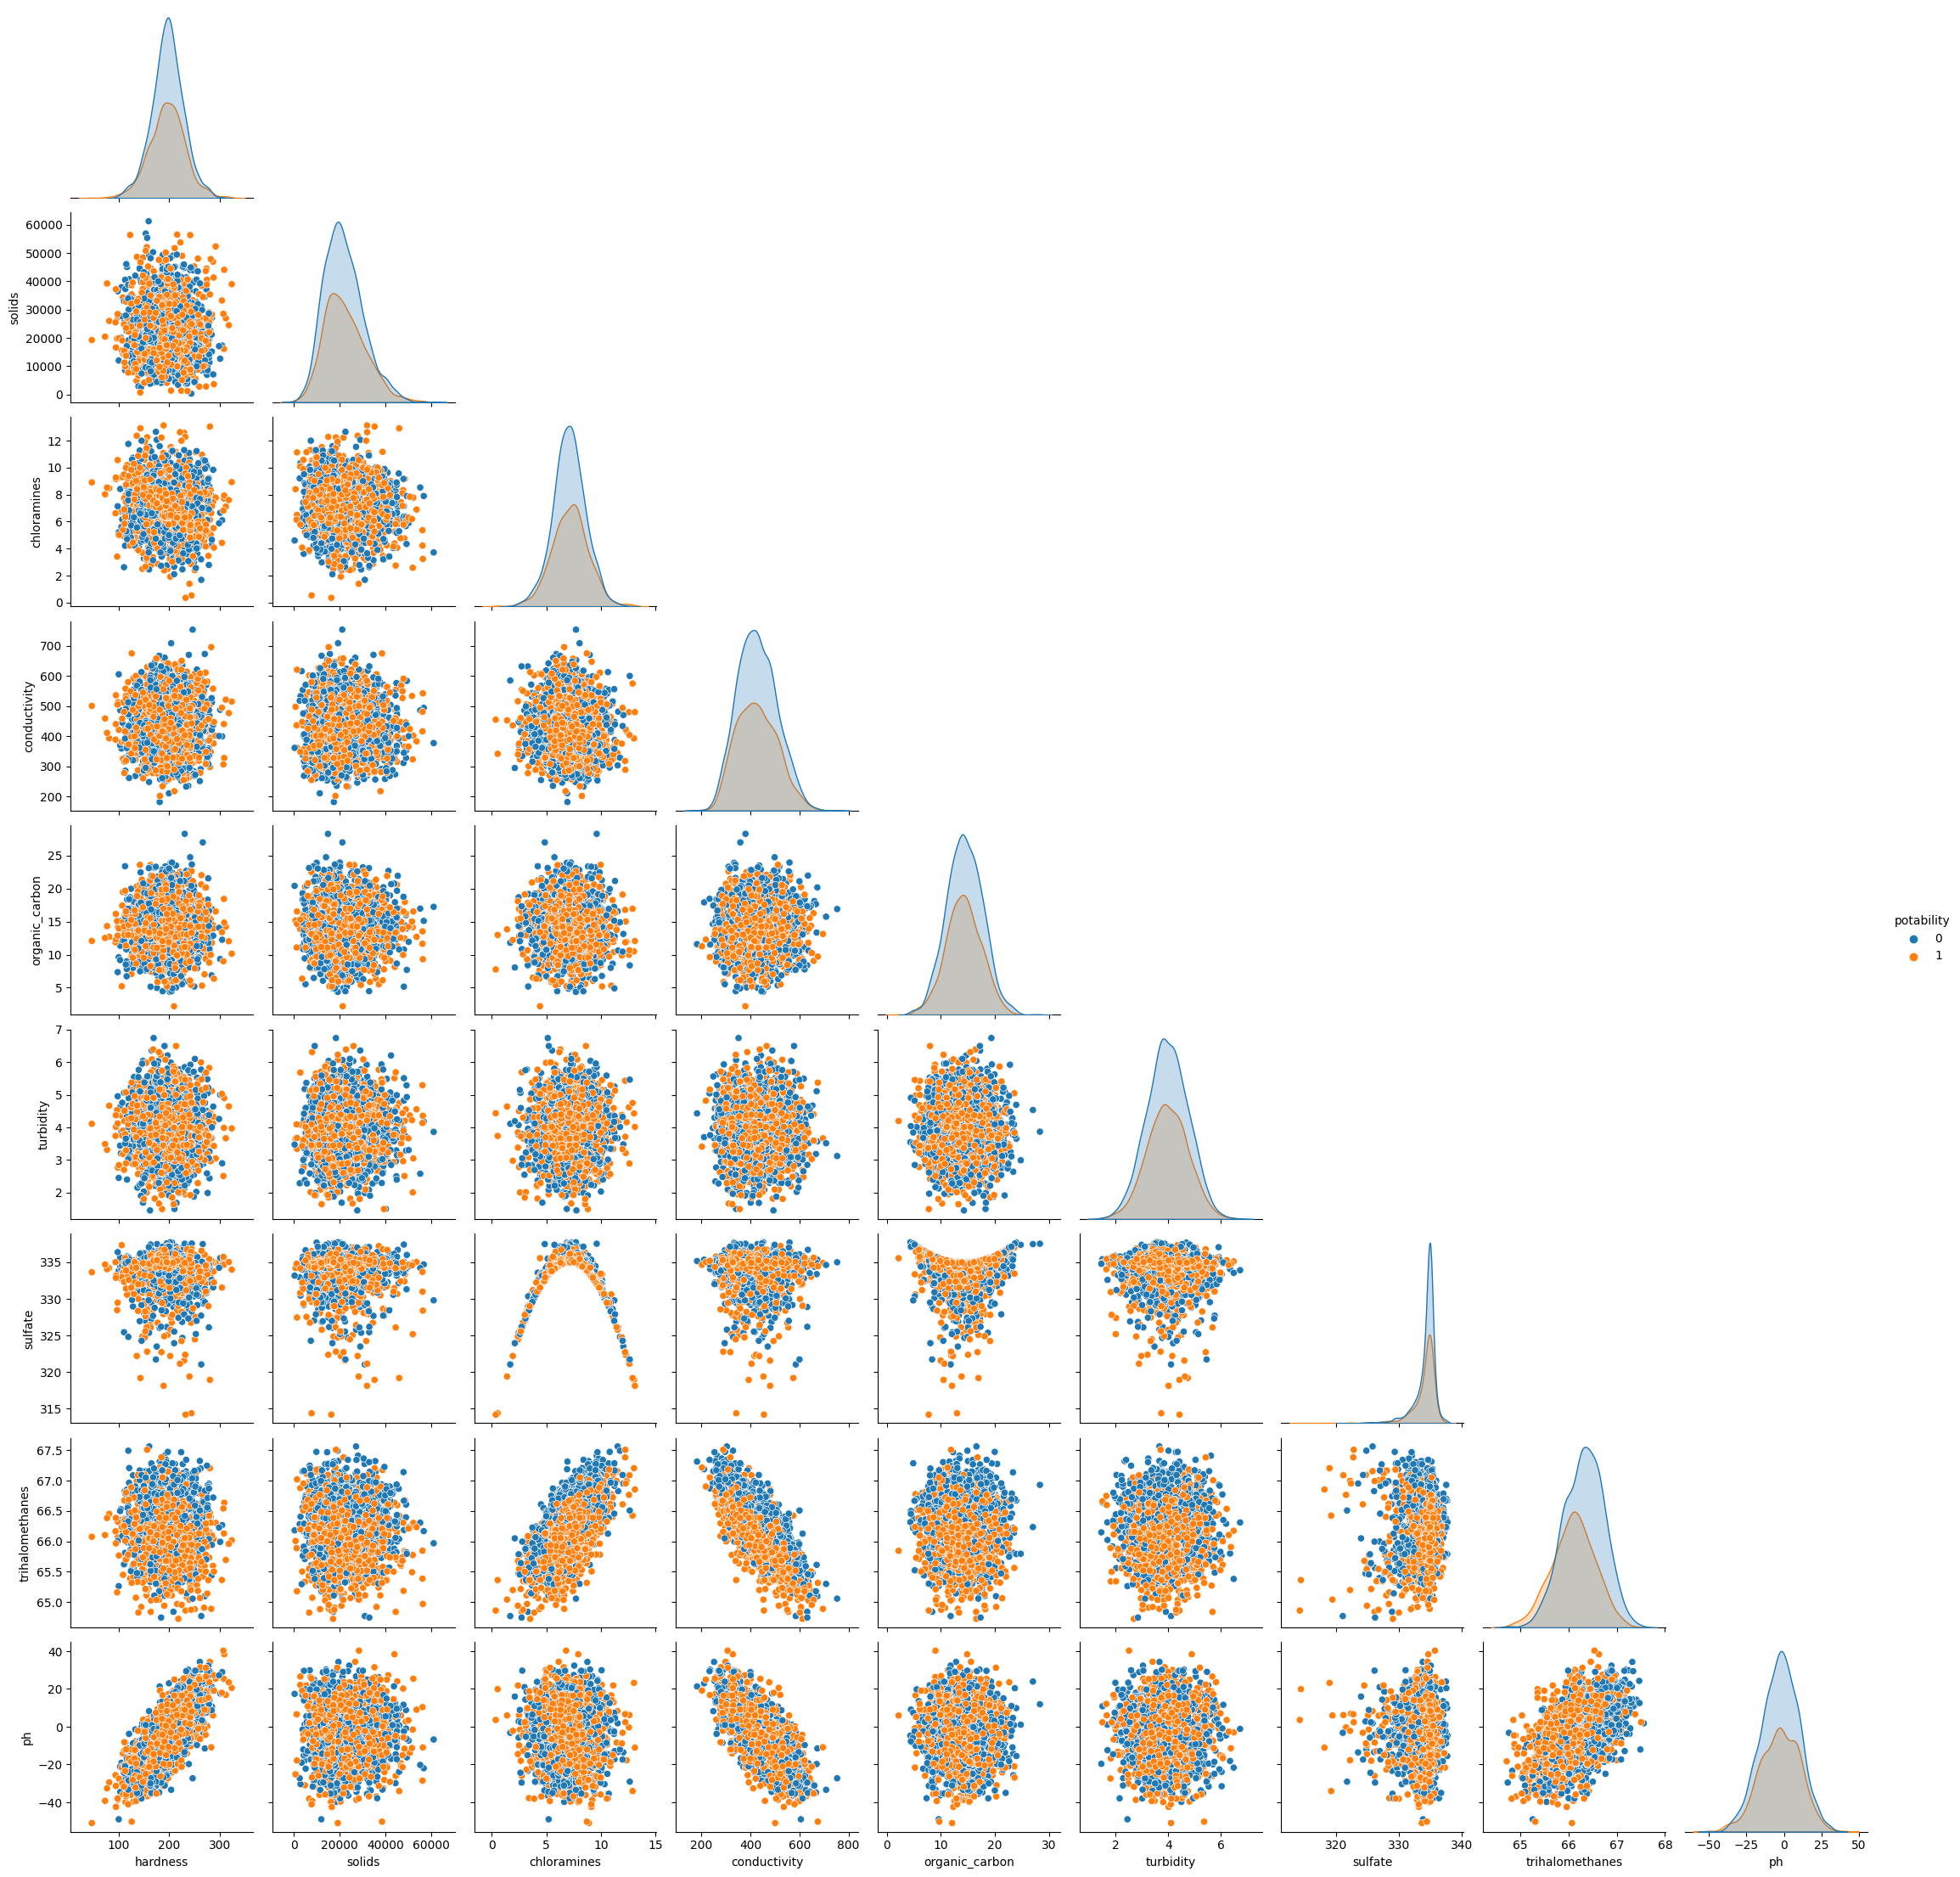

In [97]:
sns.pairplot(df, corner=True, hue='potability')

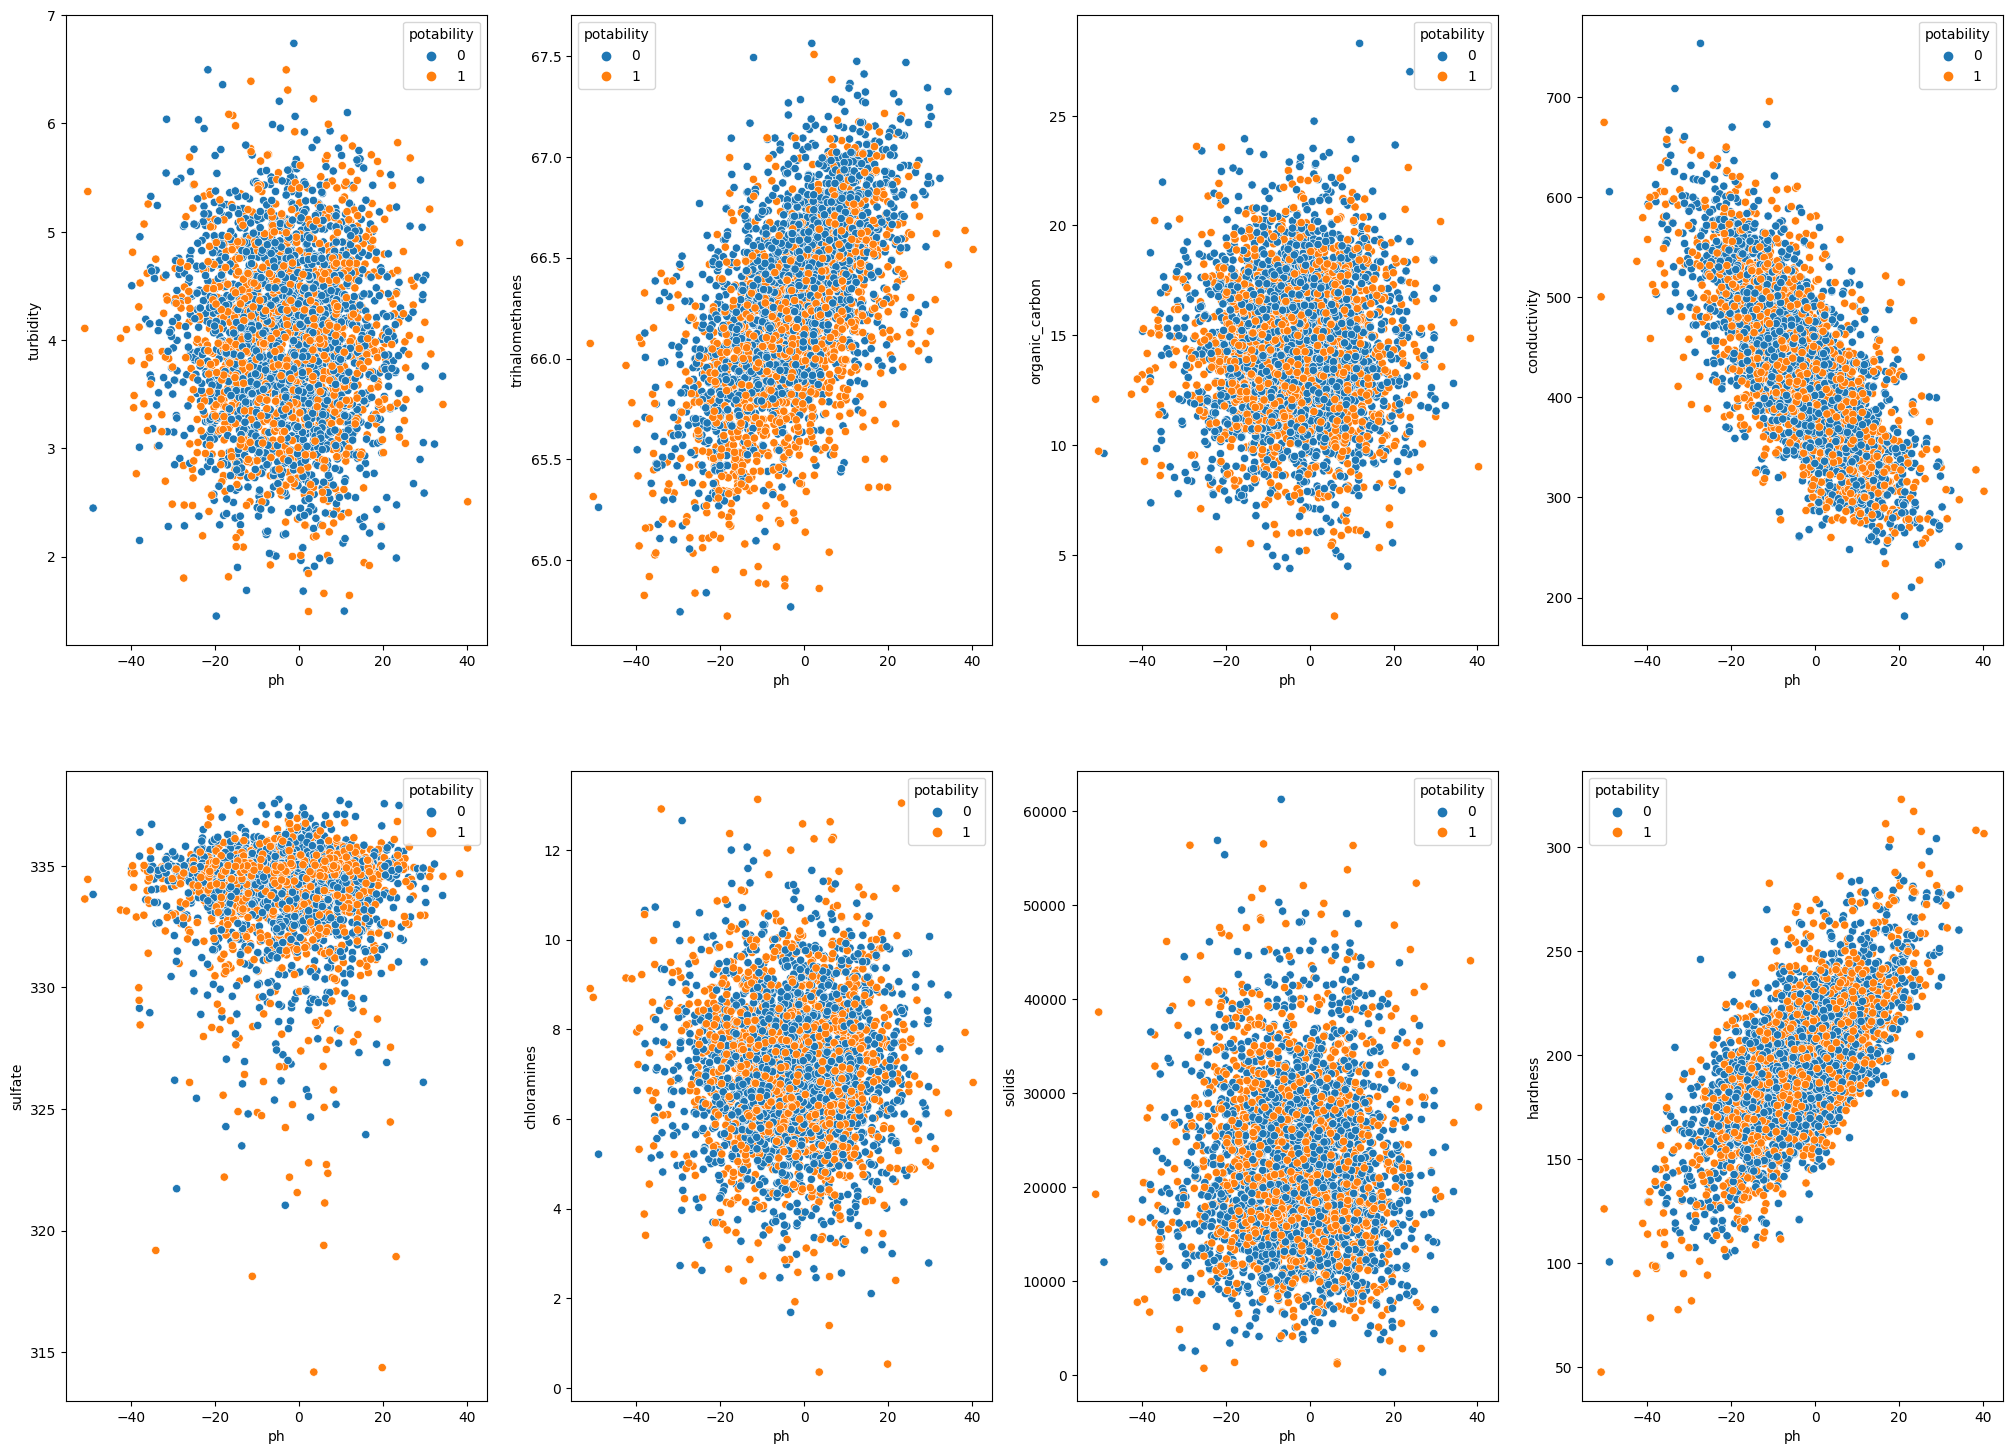

In [98]:
plt.rcParams['figure.figsize'] = (25.0, 18)

fig, axs = plt.subplots(ncols=4, nrows=2, sharey=False)
sns.scatterplot(x='ph', y='turbidity',       data=df, ax=axs[0][0], hue='potability')
sns.scatterplot(x='ph', y='trihalomethanes', data=df, ax=axs[0][1], hue='potability')
sns.scatterplot(x='ph', y='organic_carbon',  data=df, ax=axs[0][2], hue='potability')
sns.scatterplot(x='ph', y='conductivity',    data=df, ax=axs[0][3], hue='potability')
sns.scatterplot(x='ph', y='sulfate',         data=df, ax=axs[1][0], hue='potability')
sns.scatterplot(x='ph', y='chloramines',     data=df, ax=axs[1][1], hue='potability')
sns.scatterplot(x='ph', y='solids',          data=df, ax=axs[1][2], hue='potability')
sns.scatterplot(x='ph', y='hardness',        data=df, ax=axs[1][3], hue='potability')


plt.show()

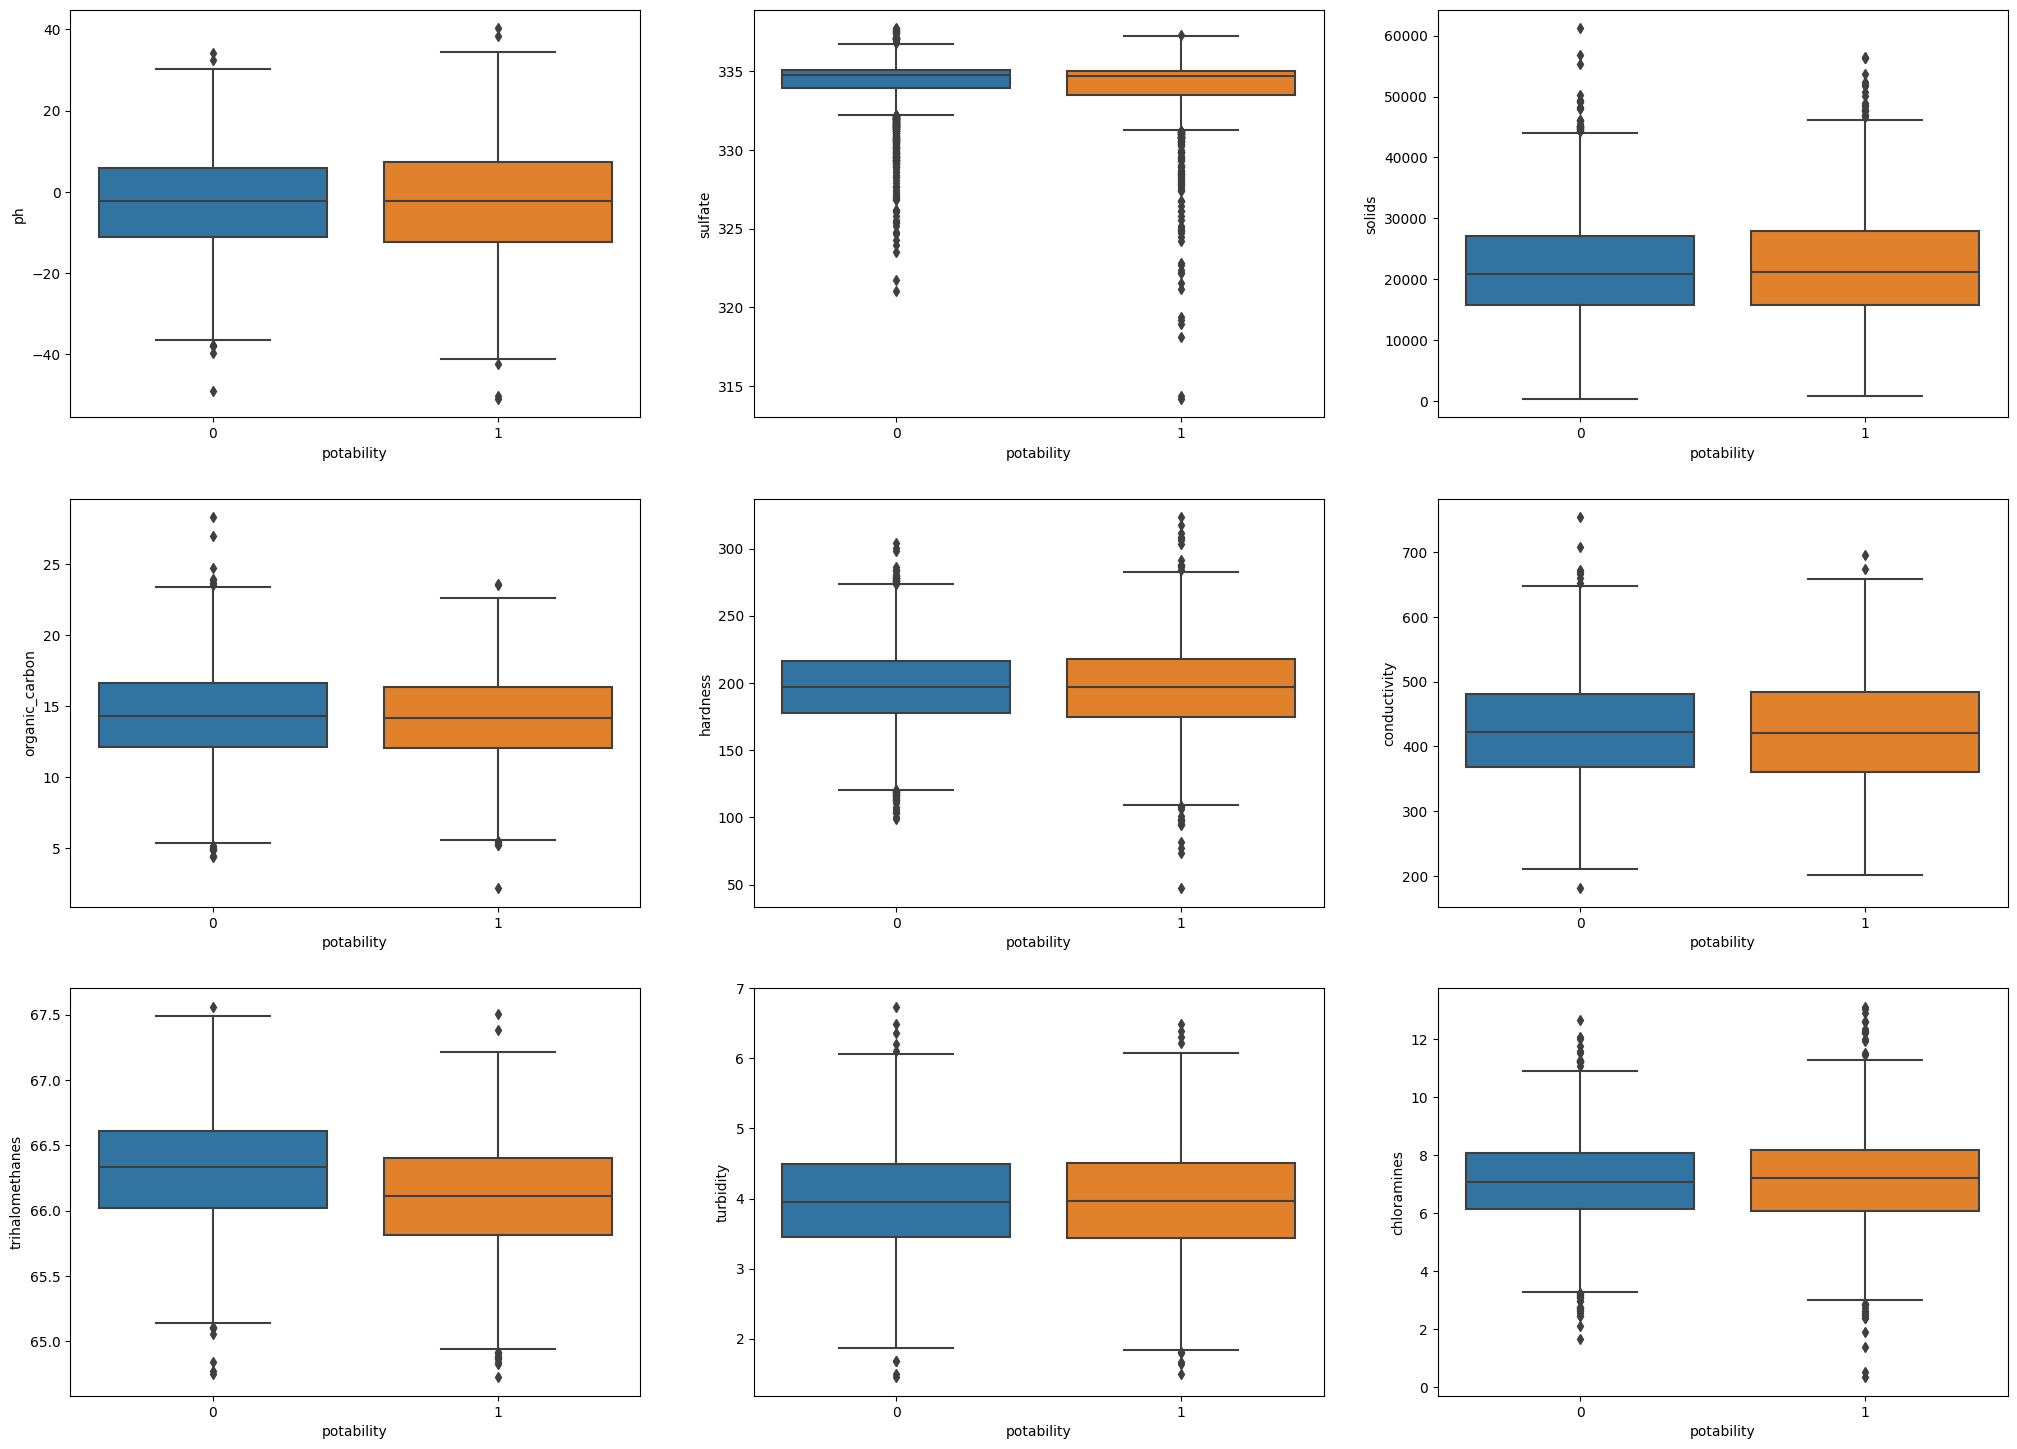

In [99]:
plt.rcParams['figure.figsize'] = (25.0, 18)

fig, axs = plt.subplots(ncols=3, nrows=3, sharey=False)
sns.boxplot(x=df['potability'], y=df['ph'], ax=axs[0][0])
sns.boxplot(x=df['potability'], y=df['sulfate'], ax=axs[0][1])
sns.boxplot(x=df['potability'], y=df['solids'], ax=axs[0][2])
sns.boxplot(x=df['potability'], y=df['organic_carbon'], ax=axs[1][0])
sns.boxplot(x=df['potability'], y=df['hardness'], ax=axs[1][1])
sns.boxplot(x=df['potability'], y=df['conductivity'], ax=axs[1][2])
sns.boxplot(x=df['potability'], y=df['trihalomethanes'], ax=axs[2][0])
sns.boxplot(x=df['potability'], y=df['turbidity'], ax=axs[2][1])
sns.boxplot(x=df['potability'], y=df['chloramines'], ax=axs[2][2])


plt.show()

## Feature pre-processing

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [129]:
df = pd.read_csv("water_potability.csv", sep=',')
df.columns = [col.lower() for col in df]

features = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity']
target = 'potability'
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity   
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654  \
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

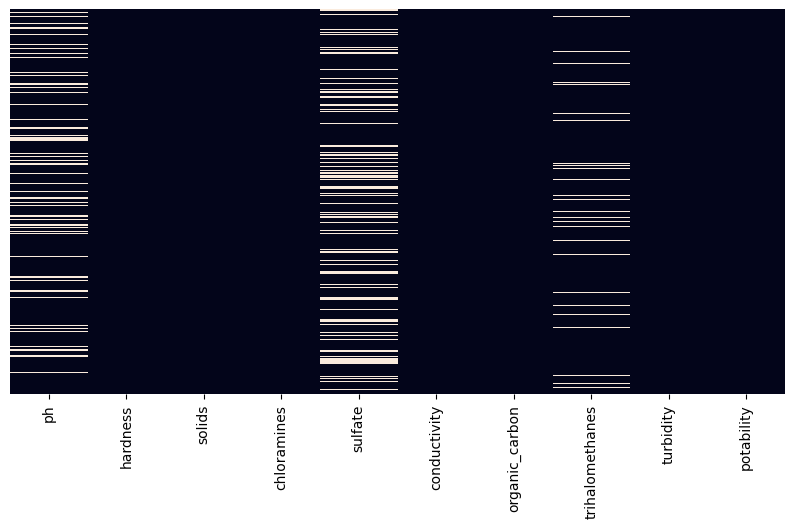

In [130]:
plt.rcParams['figure.figsize'] = (10.0, 5)

# Creazione del grafico dei valori mancanti utilizzando Seaborn
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.show()

Gestisco i valori nulli effettuando una media pesata dei valori 0 e 1 della colonna target (potability)

In [131]:
from sklearn.utils  import resample
from sklearn.utils import shuffle

def fillNall(df, features):
    
    for feature in features:
        
        condition = df['potability'] == 0

        map = {

            True: df.loc[df['potability']==0][feature].median(),
            False:df.loc[df['potability']==1][feature].median()
        }

        df[feature].fillna(condition.map(map), inplace=True)
    return df

def base_resampling(df):
    potable   = df[df['potability'] == 1]
    unpotable = df[df['potability'] == 0]

    potable_sampled = resample(potable, replace=True, n_samples=unpotable.shape[0], random_state=0)

    df_upsampled = pd.concat([unpotable, potable_sampled])
    df_upsampled = shuffle(df_upsampled, random_state=0)

    return df

In [136]:
# Creazione del ColumnTransformer con lo StandardScaler

scaler_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features),
    ],
    remainder='passthrough'
)

preprocessing_pipeline = Pipeline([
    ('fill_nan', FunctionTransformer(fillNall, kw_args={'features': ['ph', 'sulfate', 'trihalomethanes']})),
    ('resamp', FunctionTransformer(base_resampling)),
    ('scaler', scaler_transformer),
])

A = preprocessing_pipeline.fit_transform(df.copy(deep=True))

X, y = A[:, :-1], A[:, -1]

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)

X_train = np.concatenate((X_train, X_train), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)

## Models

In [216]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score, precision_score, accuracy_score

### Baseline models

Base-baseline model

In [83]:
baseline_accuracy = df[df['potability'] == 0]['potability'].count() / df['potability'].count()
print("Baseline model accuracy:", baseline_accuracy)

Baseline model accuracy: 0.6098901098901099


Cross validation

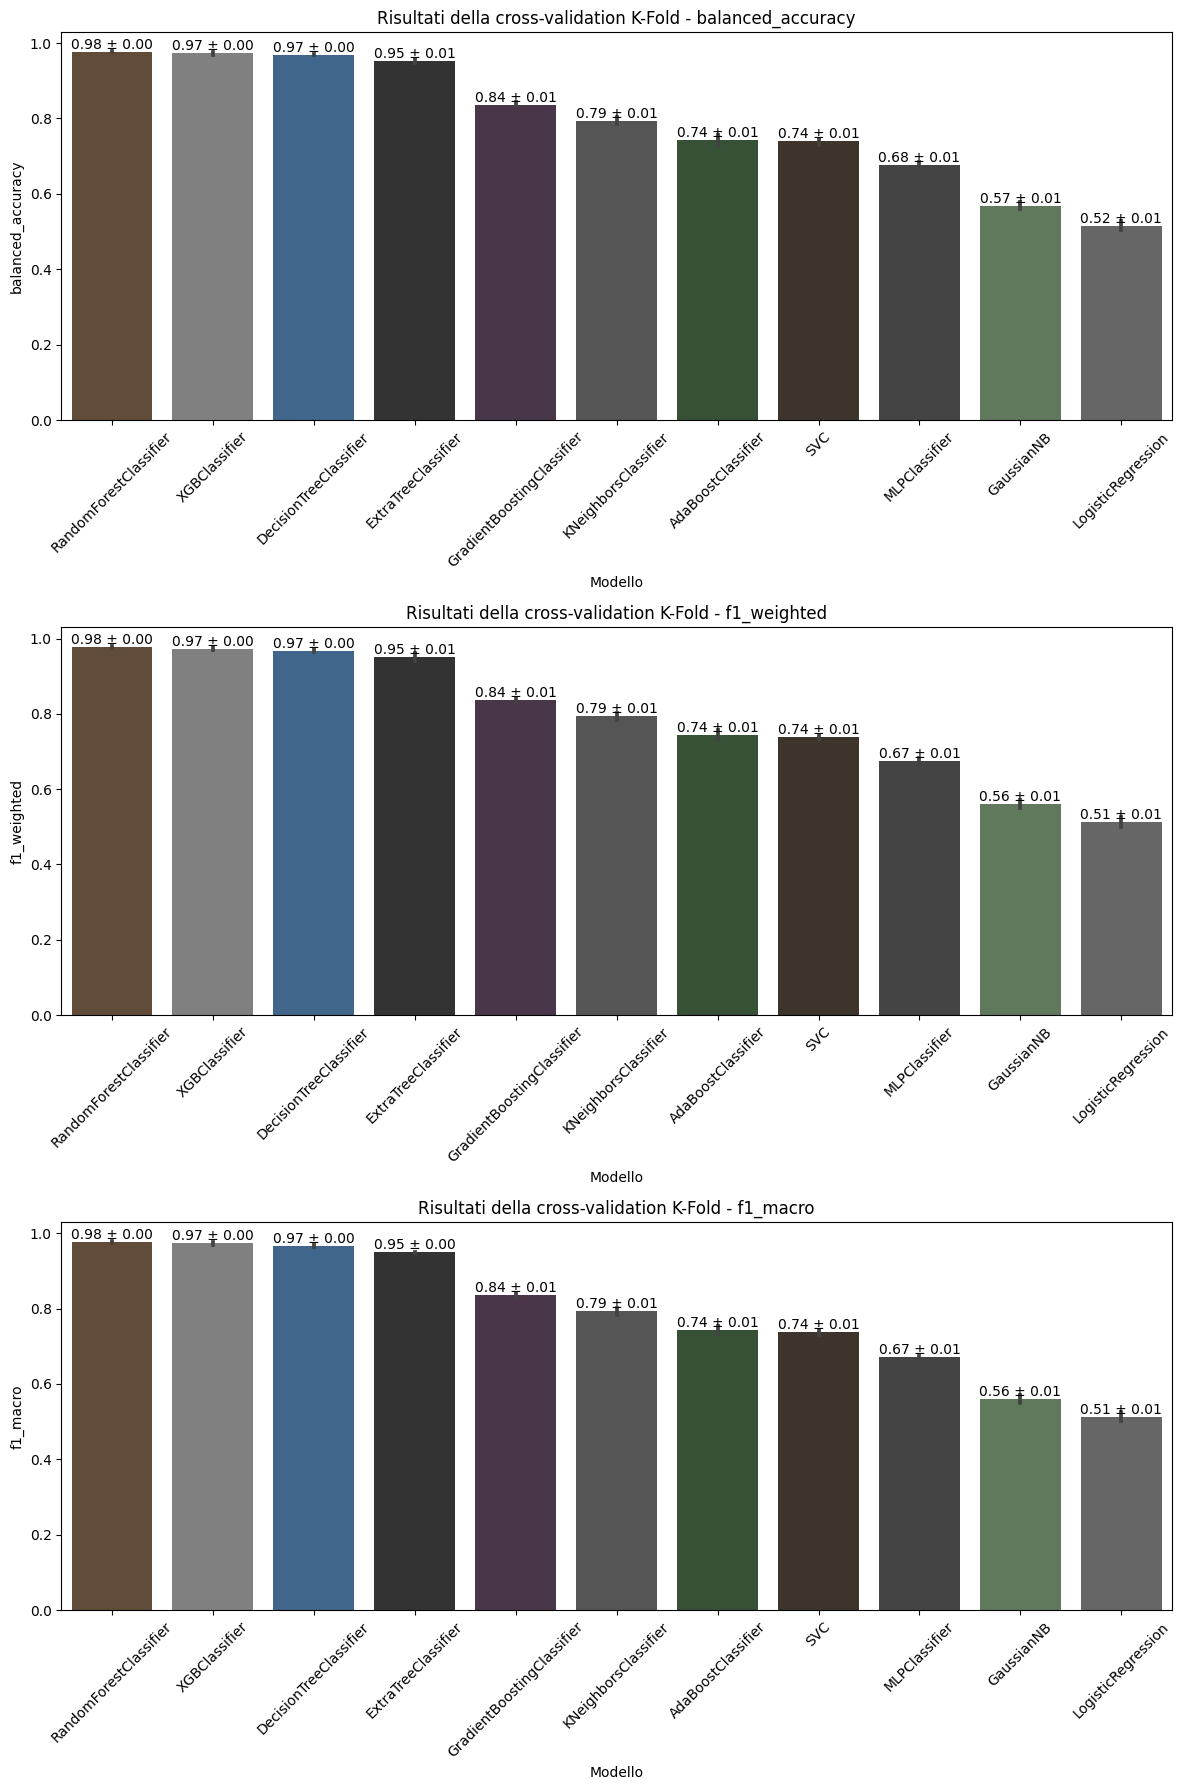

In [217]:
import matplotlib.colors as mcolors

# Definizione dei modelli
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    ExtraTreeClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

# Creazione del KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


# Definizione delle metriche da considerare
metrics = ["balanced_accuracy", "f1_weighted", "f1_macro"]

# Lista per salvare i risultati delle diverse metriche
results = {metric: [] for metric in metrics}

# Esecuzione della cross-validation per le diverse metriche
for model in models:
    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1, scoring=metric)
        results[metric].append(scores)

# Creazione del plot con Seaborn per le diverse metriche
plt.rcParams['figure.figsize'] = (12, 18)
num_metrics = len(metrics)

model_colors = {
    'LogisticRegression': '#666666',
    'DecisionTreeClassifier': '#336699',
    'GaussianNB': '#5C7E58',
    'RandomForestClassifier': '#664C33',
    'XGBClassifier': '#808080',
    'AdaBoostClassifier': '#335533',
    'GradientBoostingClassifier': '#4C344C',
    'KNeighborsClassifier': '#555555',
    'SVC': '#403529',
    'ExtraTreeClassifier': '#333333',
    'MLPClassifier': '#444444'
}


for i, metric in enumerate(metrics):

    # Ordinamento dei modelli in base alla media delle metriche
    sorted_models = sorted(models, key=lambda model: np.mean(results[metric][models.index(model)]), reverse=True)

    ax = plt.subplot(num_metrics, 1, i + 1)
    metric_results = [results[metric][models.index(model)] for model in sorted_models]

    # Trasformazione dei nomi dei colori in RGBA
    model_colors_rgba = [model_colors[type(model).__name__] for model in sorted_models]

    sns.barplot(data=metric_results, palette=model_colors_rgba)
    plt.xticks(range(len(models)), [type(model).__name__ for model in sorted_models], rotation=45)
    plt.xlabel('Modello')
    plt.ylabel(metric)
    plt.title(f'Risultati della cross-validation K-Fold - {metric}')

    # Aggiunta delle percentuali sulle barre
    for j in range(len(models)):
        scores = metric_results[j]
        mean_score = scores.mean()
        std_score = scores.std()
        text = f'{mean_score:.2f} ± {std_score:.2f}'
        ax.text(j, mean_score, text, ha='center', va='bottom')

plt.tight_layout()
plt.show()

The three models with highest score are:

- Random Forest
- XGB Classifier
- Decision Tree

## Hyperparameter tuning of all 3 models

Grid-search function

In [192]:
def gridsearch(X_train, y_train, parameters, kfold, metric, model):

    kfold = KFold(n_splits=kfold, shuffle=True, random_state=0)

    grid_search = GridSearchCV(model, parameters, cv=kfold, n_jobs=-1, scoring=metric)
    grid_search.fit(X_train, y_train)
    
    return grid_search

Random Forest

In [193]:
# Definisci i parametri da esplorare nella grid search
parameters = {
    'n_estimators': [200],
    'max_depth': [50],# ->
    'min_samples_split': [2],# ->
    'min_samples_leaf': [1],# 2, 4, 10],
    'max_features': ['sqrt'],
    'random_state': [0],
}

metric = 'accuracy'

# Creazione del GridSearch
grid_search = gridsearch(X_train, y_train, parameters, 8, metric, RandomForestClassifier())

# Stampa i migliori parametri e lo score ottenuto
print("########## ", metric.upper(), " ##########")
print("Migliori parametri trovati:")
print(grid_search.best_params_)
print("Miglior score ottenuto:")
print(grid_search.best_score_)

##########  ACCURACY  ##########
Migliori parametri trovati:
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 0}
Miglior score ottenuto:
0.9866518353726362


In [170]:
# Model fitting

rnd = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=2,
                                min_samples_leaf=1, max_features='sqrt', random_state=0, n_jobs=-1)
rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy score: 0.91
F1 score: 0.910022502250225
Recall: 0.8888888888888888
Precision: 0.934010152284264
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       193
         1.0       0.93      0.89      0.91       207

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



XGBoost

In [194]:
# Definisci i parametri da esplorare nella grid search
#setting grid of selected parameters for iteration
parameters = {
                'gamma': [0], # ok
                'learning_rate': [0.1], # Ok
                'max_depth': [25], # ok
                'n_estimators': [200], # Ok
                'reg_alpha': [1],#ok
                'reg_lambda': [5],# ok
                'booster': ['gbtree'] # ok
}

metric = 'accuracy'

# Creazione del GridSearch
grid_search = gridsearch(X_train, y_train, parameters, 8, metric, XGBClassifier())

# Stampa i migliori parametri e lo score ottenuto
print("########## ", metric.upper(), " ##########")
print("Migliori parametri trovati:")
print(grid_search.best_params_)
print("Miglior score ottenuto:")
print(grid_search.best_score_)

##########  ACCURACY  ##########
Migliori parametri trovati:
{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 200, 'reg_alpha': 1.6, 'reg_lambda': 10}
Miglior score ottenuto:
0.9852614015572858


In [199]:
# Model fitting
xgb = XGBClassifier(n_estimators=200, max_depth=25, learning_rate=0.1, gamma=0, reg_alpha=1, reg_lambda=5, booster='gbtree')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.88
F1 score: 0.8797045523063008
Recall: 0.9178743961352657
Precision: 0.8597285067873304
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       193
         1.0       0.86      0.92      0.89       207

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



Decision Tree

In [207]:
# Create the parameter grid based on the results of random search 
parameters = {
    'max_depth': [200, 300, 400, 500],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_features': ["sqrt", "log2", None],
    'min_samples_split': [2, 5, 10, 20],
    'random_state': [0],
}

metric = 'accuracy'

# Creazione del GridSearch
grid_search = gridsearch(X_train, y_train, parameters, 8, metric, DecisionTreeClassifier())

# Stampa i migliori parametri e lo score ottenuto
print("########## ", metric.upper(), " ##########")
print("Migliori parametri trovati:")
print(grid_search.best_params_)
print("Miglior score ottenuto:")
print(grid_search.best_score_)

##########  ACCURACY  ##########
Migliori parametri trovati:
{'criterion': 'entropy', 'max_depth': 200, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 0}
Miglior score ottenuto:
0.9289488320355951


In [208]:
# Model fitting
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=200, min_samples_leaf=5, min_samples_split=2, random_state=0, max_features=None)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score: 0.8275
F1 score: 0.8273973465130701
Recall: 0.8454106280193237
Precision: 0.8254716981132075
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       193
         1.0       0.83      0.85      0.84       207

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



Voting Classifier

In [211]:
from sklearn.ensemble import VotingClassifier
ens_soft_voting = VotingClassifier(
    estimators=[

        ('XGBoost',      XGBClassifier(n_estimators=200, max_depth=25, learning_rate=0.1, gamma=0, reg_alpha=1, reg_lambda=5, booster='gbtree')),
        ('RandomForest', RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=2,
                                min_samples_leaf=1, max_features='sqrt', random_state=0, n_jobs=-1)),
        ('DecisionTree', DecisionTreeClassifier(criterion="entropy", max_depth=200, min_samples_leaf=5, min_samples_split=2, random_state=0, max_features=None)),
],
    voting='hard',
    n_jobs=8
)
ens_soft_voting.fit(X_train, y_train)

y_pred = ens_soft_voting.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       193
         1.0       0.89      0.89      0.89       207

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.89      0.88       400

